In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from matplotlib.patches import Ellipse, Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.image as mping

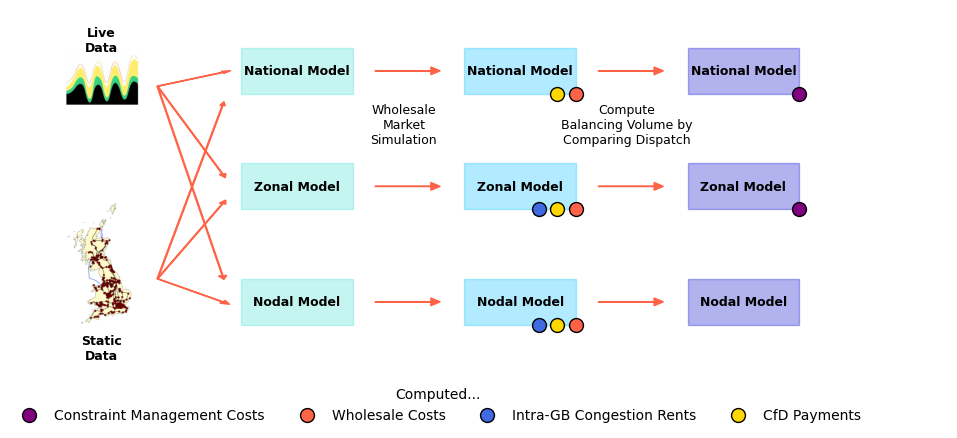

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

colors = {
    'balancing_cost_savings': 'purple',
    'wholesale_cost_savings': 'tomato',
    'congestion_rent_savings': 'royalblue',
    'cfd_cost_savings': 'gold',
}

bw = 0.12
bh = 0.12
bgap = 0.18

top_edge = 0.1
side_edge = 0.04

left_colour = 'turquoise'
middle_colour = 'deepskyblue'
right_colour = 'mediumblue'

box_kwargs = {'linewidth': 1, 'alpha': 0.3, 'zorder': 0}

ac = 'tomato'
arrow_kwargs = dict(head_length=0.01, fc=ac, ec=ac)


for x, s in zip(range(3), ['National Model', 'Zonal Model', 'Nodal Model']):
    ax.add_patch(Rectangle(
        (side_edge + 0.2, 1 - top_edge - bh - x * (bh + bgap)),
        bw, bh,
        facecolor=left_colour, edgecolor=left_colour,
        **box_kwargs
    ))
    ax.text(
        side_edge + 0.2 + bw/2,
        1 - top_edge - bh - x * (bh + bgap) + 0.5*bh,
        s, va='center', ha='center', fontsize=9, fontweight='bold',
        )
    ax.arrow(
        0.15, 0.3, 
        0.07,
        (2 - x) * 0.85 * (bh + bgap) - 0.5*bh,
        head_width=(2+0.5*x)*0.003,
        **arrow_kwargs
        )
    ax.arrow(
        0.15, 0.8, 
        0.07,
        - x * 0.88 * (bh + bgap) + 0.3*bh,
        head_width=(2+0.5*x)*0.003,
        **arrow_kwargs
        )


mid_gap = 0.12
for x, s in zip(range(3), ['National Model', 'Zonal Model', 'Nodal Model']):
    ax.add_patch(Rectangle(
        (side_edge + mid_gap + bw + 0.2, 1 - top_edge - bh - x * (bh + bgap)),
        bw, bh,
        facecolor=middle_colour, edgecolor=middle_colour,
        **box_kwargs
    ))
    ax.text(
        side_edge + mid_gap + bw + 0.2 + bw/2,
        1 - top_edge - bh - x * (bh + bgap) + 0.5*bh,
        s, va='center', ha='center', fontsize=9, fontweight='bold',
        )
    ax.arrow(
        side_edge + 0.2 + bh * 1.2,
        1 - top_edge - bh - x * (bh + bgap) + 0.5*bh,
        mid_gap - bw/2,
        0,
        head_width=0.02,
        **arrow_kwargs
        )
    ax.scatter(
        [side_edge + 0.206 + bh * 1.2 + 2*bw - 0.03],
        [1 - top_edge - 1.5*bh - x * (bh + bgap) + 0.5*bh],
        s=100, color=colors['wholesale_cost_savings'],
        edgecolor='k',
    )
    if x > 0:
        ax.scatter(
            [side_edge + 0.206 + bh * 1.2 + 2*bw - 0.03 - 0.04],
            [1 - top_edge - 1.5*bh - x * (bh + bgap) + 0.5*bh],
            s=100, color=colors['congestion_rent_savings'],
            edgecolor='k',
        )
    ax.scatter(
        [side_edge + 0.206 + bh * 1.2 + 2*bw - 0.03 - 0.02],
        [1 - top_edge - 1.5*bh - x * (bh + bgap) + 0.5*bh],
        s=100, color=colors['cfd_cost_savings'],
        edgecolor='k',
    )


for x, s in zip(range(3), ['National Model', 'Zonal Model', 'Nodal Model']):
    ax.add_patch(Rectangle(
        (side_edge + 2*(mid_gap + bw) + 0.2, 1 - top_edge - bh - x * (bh + bgap)),
        bw, bh,
        facecolor=right_colour, edgecolor=right_colour,
        **box_kwargs
    ))
    ax.text(
        side_edge + (mid_gap + bw)*2 + 0.2 + bw/2,
        1 - top_edge - bh - x * (bh + bgap) + 0.5*bh,
        s, va='center', ha='center', fontsize=9, fontweight='bold',
        )
    ax.arrow(
        side_edge + 0.2 + bh * 1.2 + mid_gap + bw,
        1 - top_edge - bh - x * (bh + bgap) + 0.5*bh,
        mid_gap - bw/2,
        0,
        head_width=0.02,
        **arrow_kwargs
        )
    """
    ax.arrow(
        side_edge + 0.19 + bh * 1.2 + 2 * (mid_gap + bw),
        1 - top_edge - bh - x * (bh + bgap) + 0.5*bh,
        mid_gap - bw/1.5,
        0,
        head_width=0.02,
        **arrow_kwargs
        )
    """
    if x < 2:
        ax.scatter(
            [side_edge + 0.206 + bh * 1.2 + 2*bw + mid_gap + bw - 0.03],
            [1 - top_edge - 1.5*bh - x * (bh + bgap) + 0.5*bh],
            s=100, color=colors['balancing_cost_savings'],
            edgecolor='k',
        )
    """
    if x > 0:
        ax.scatter(
            [side_edge + 0.206 + bh * 1.2 + 2*bw + mid_gap + bw*1.5],
            [1 - top_edge - 1.5*bh - x * (bh + bgap) + 0.5*bh+0.25*bh],
            s=100, color=colors['congestion_rent_savings'],
            edgecolor='k',
        )
    ax.scatter(
        [side_edge + 0.206 + bh * 1.2 + 2*bw + mid_gap + bw*1.5],
        [1 - top_edge - 1.5*bh - x * (bh + bgap) + 0.5*bh+0.75*bh],
        s=100, color=colors['cfd_cost_savings'],
        edgecolor='k',
    )
    """

network_img = mping.imread('networkpng.PNG')
ax.imshow(network_img, extent=(0.05, 0.13, 0.18, 0.5), aspect='auto')
ax.text(0.09, 0.12, 'Static\nData', va='center', ha='center', fontsize=9, fontweight='bold')

live_img = mping.imread('live data symbol.PNG')
ax.imshow(live_img, extent=(0.05, 0.13, 0.75, 0.88), aspect='auto')
ax.text(0.09, 0.92, 'Live\nData', va='center', ha='center', fontsize=9, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlim(0, 1.)
ax.set_ylim(0, 1)



nice_names = {
    'balancing_cost_savings': 'Constraint Management Costs',
    'wholesale_cost_savings': 'Wholesale Costs',
    'congestion_rent_savings': 'Intra-GB Congestion Rents',
    'cfd_cost_savings': 'CfD Payments',
}

from matplotlib.lines import Line2D

labels, handles = [], []
for key in list(colors):
    c, name = colors[key], nice_names[key]
    handles.append(Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor=c, markeredgecolor='k'))
    labels.append(name)

ax.legend(
    handles, labels,
    title='Computed...',
    bbox_to_anchor=(0.92, 0.05),
    ncol=4,
    frameon=False,
)

ax.text(0.415, 0.7, 'Wholesale\nMarket\nSimulation', va='center', ha='center', fontsize=9)
ax.text(0.415 + mid_gap + bw, 0.7, 'Compute\nBalancing Volume by\nComparing Dispatch', va='center', ha='center', fontsize=9)
# ax.text(0.4 + 2 * (mid_gap + bw), 0.7, 'Postprocessing', va='center', ha='center', fontsize=9)


plt.savefig('model_flowchart.png', dpi=300)
plt.show()